# **Twitter Sentiment Analysis**

**Problem Statement**

The objective of this project is to develop a Twitter sentiment analysis system that accurately classifies the sentiment expressed in tweets. With the increasing popularity and influence of social media platforms like Twitter, understanding public sentiment has become crucial for various applications such as brand monitoring, market research, and public opinion analysis. However, analyzing the sentiment of large volumes of tweets manually is time-consuming and impractical.

Finding sentiments in a tweet holds significant importance due to several reasons:

1. Understanding Public Opinion: Twitter serves as a platform where individuals freely express their thoughts and opinions. By analyzing sentiments in tweets, we can gain valuable insights into public opinion on various topics, including brands, products, events, and social issues. This understanding helps businesses, organizations, and policymakers gauge public sentiment and make informed decisions accordingly.

2. Brand Monitoring and Reputation Management: Sentiment analysis allows businesses to monitor their brand perception and reputation on Twitter. By analyzing tweets, they can identify positive or negative sentiments associated with their brand, products, or services. This information helps companies respond to customer feedback, address complaints, and improve their overall reputation.

3. Market Research: Sentiment analysis of tweets provides a rich source of data for market research. By examining sentiments related to specific products or services, companies can gain insights into customer preferences, identify emerging trends, and make data-driven decisions to improve their offerings and stay ahead of the competition.

**Dataset Link :-** https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/code

# **Pipeline**

Here are the general steps involved in an NLP (Natural Language Processing) project:

1. Define the Problem: Clearly define the problem you want to solve using NLP techniques. Determine the specific objectives and the desired outcome of the project.

2. Gather and Preprocess Data: Collect the relevant dataset for your project. This could include scraping data from websites, accessing APIs, or using pre-existing datasets. Preprocess the data by cleaning it, removing noise, handling missing values, and performing necessary transformations.

3. Exploratory Data Analysis (EDA): Perform exploratory analysis on the dataset to gain insights into its characteristics, identify patterns, and understand the distribution of data. Visualize the data to discover any trends or relationships that may inform subsequent steps.

4. Text Preprocessing: Process the text data to convert it into a format suitable for analysis. This step typically involves tokenization (breaking text into individual words or tokens), removing stop words, applying stemming or lemmatization, handling special characters or symbols, and performing other text-specific preprocessing techniques.

5. Feature Extraction: Extract relevant features from the preprocessed text to represent it numerically. Common techniques include bag-of-words, TF-IDF (Term Frequency-Inverse Document Frequency), word embeddings (such as Word2Vec or GloVe), or more advanced methods like BERT (Bidirectional Encoder Representations from Transformers).

6. Model Selection and Training: Choose an appropriate model for your NLP task, such as classification, sentiment analysis, named entity recognition, or machine translation. Consider algorithms like Naive Bayes, Support Vector Machines (SVM), Recurrent Neural Networks (RNN), or Transformer-based models. Split the data into training and testing sets, and train the selected model using the training data.

7. Model Evaluation: Evaluate the performance of the trained model using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC-ROC). This step helps assess how well the model generalizes to unseen data and determines if any adjustments or fine-tuning are required.


The main components of the pipeline involves the EDA part where we are removing the null values as machine learning algorithms cannot handle null values and removing duplicate values. And after that text preprocessing part which involves word tokenize, stop words removal and converting the words into vectors.

These components are directly dependent on each other as null values is essential in any machine learning task or it will create errors and word tokenize is also an essential part as a whole sentence cannot be directly given to the model it first needs to be divided into tokens and after that we can choose unigram or bigram model as per the choice. Stop words are words which have irrelevent semantic meaning and do not add to the final prediction and as we know machine learning algorithm works on numerical data so we need to convert these text into vectors using some techniques.

In [1]:
import pandas as pd
import numpy as np 
import re 
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy

from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
column_names=['Tweet_ID','Entity','Sentiment','Tweet_content']

train = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv",
                    sep=',',names=column_names)
validation = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv",
                    sep=',',names=column_names)

In [3]:
train.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
validation.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# **Extrapolatory Data Analysis**

In [13]:
# information of the dataset
print(f"Train dataset shape {train.shape}")
print(f"Validation dataset shape {validation.shape}")

Train dataset shape (74682, 4)
Validation dataset shape (1000, 4)


In [14]:
# checking nan values 
print("\t\t\tTrain dataset")
print(train.isna().sum())
print("*"*40)
print("\t\t\tValidation dataset")
print(validation.isna().sum())

			Train dataset
Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64
****************************************
			Validation dataset
Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64


In [15]:
# checking duplicated values
print("\t\t\tTrain dataset")
print(train.duplicated().sum())
print("*"*40)
print("\t\t\tValidation dataset")
print(validation.duplicated().sum())

			Train dataset
2700
****************************************
			Validation dataset
0


In [16]:
# remove dupicate and nan values
train.dropna(inplace=True)
train.drop_duplicates(inplace=True)

In [21]:
# length of sentence in each row
train['text_lens']=train['Tweet_content'].apply(lambda x: len(x))
validation['text_lens']=validation['Tweet_content'].apply(lambda x: len(x))

# **Data Visualisation**

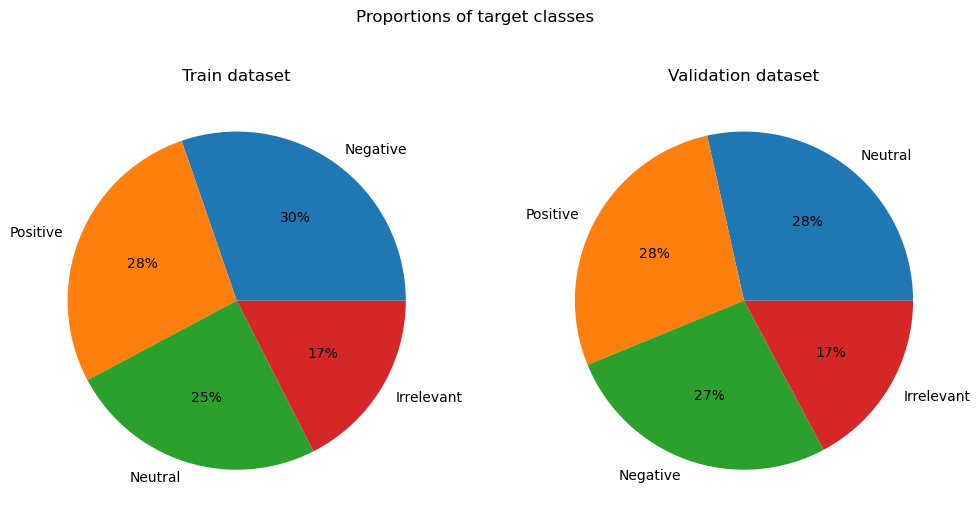

In [17]:
fig , ax = plt.subplots(1,2,figsize=(12,6))

ax[0].pie(train['Sentiment'].value_counts(),labels=train['Sentiment'].value_counts().index,autopct='%.f%%')
ax[1].pie(validation['Sentiment'].value_counts(),labels=validation['Sentiment'].value_counts().index,autopct='%.f%%')

fig.suptitle("Proportions of target classes")
ax[0].set_title("Train dataset")
ax[1].set_title("Validation dataset")

plt.show()

# **KDE Plot**

A KDE (Kernel Density Estimation) plot is a type of data visualization that displays the probability density function of a continuous variable. It is useful for visualizing the distribution of a variable and identifying peaks, modes, and areas of high or low density.

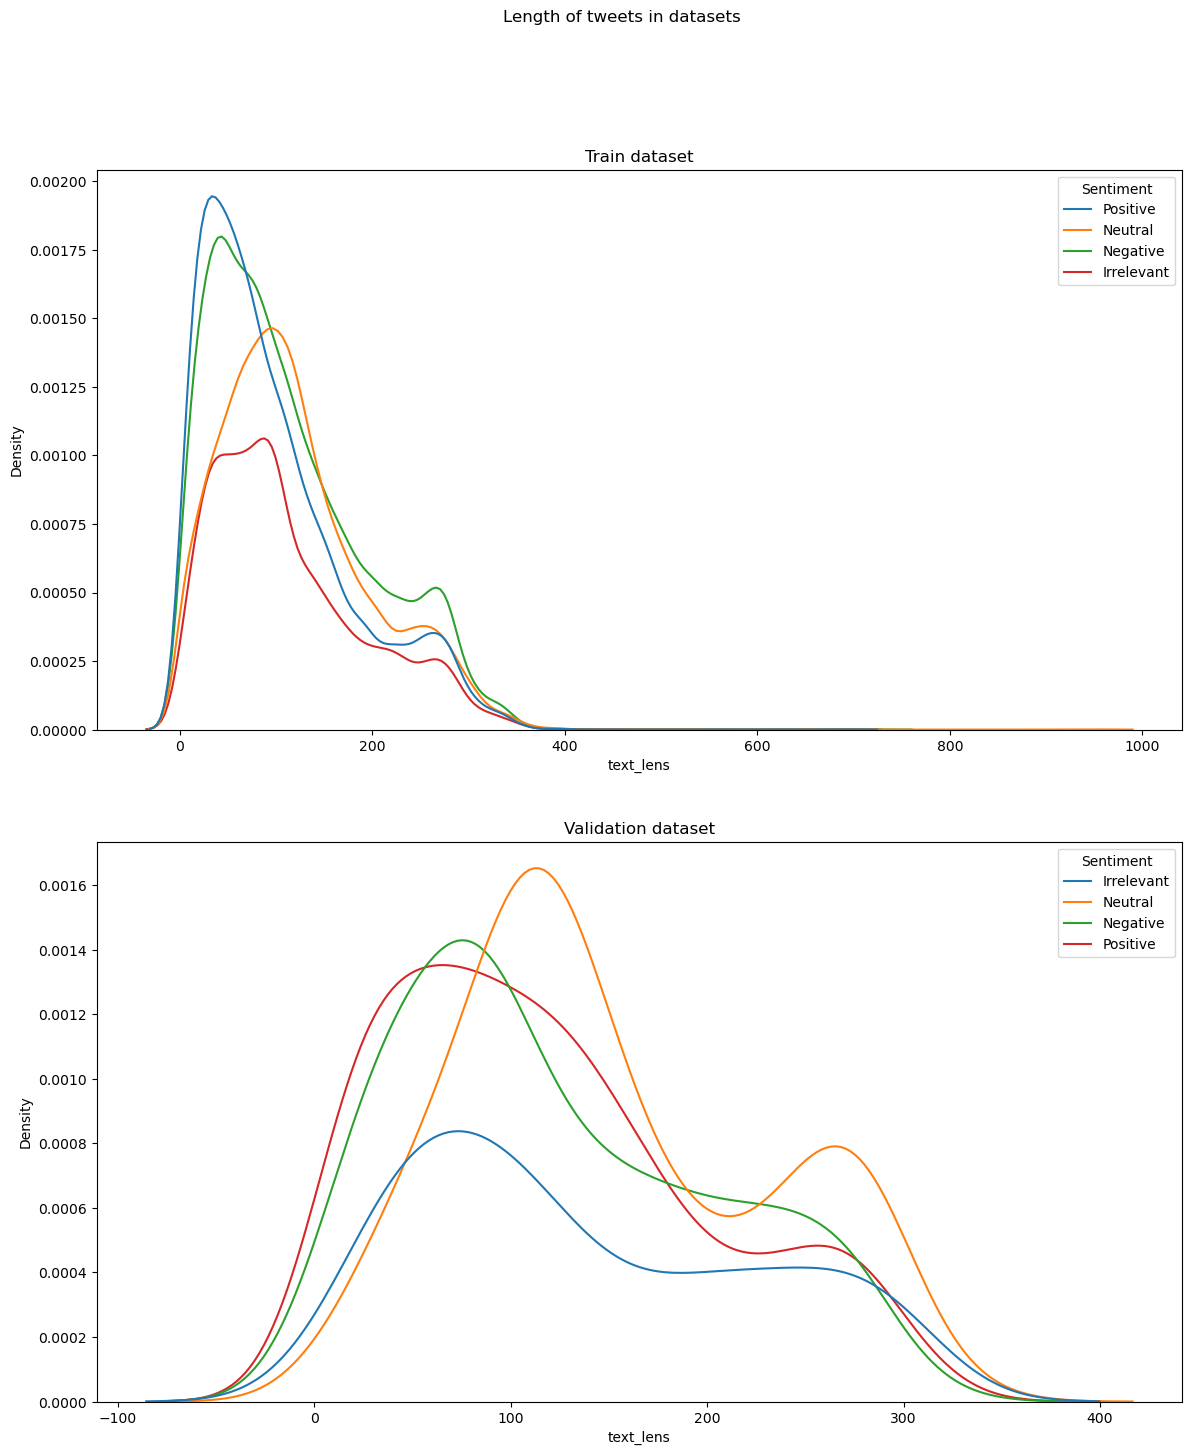

In [22]:
fig ,ax = plt.subplots(2,1,figsize=(14,16))

sns.kdeplot(data=train,x='text_lens',hue='Sentiment',ax=ax[0])
sns.kdeplot(data=validation,x='text_lens',hue='Sentiment',ax=ax[1])

fig.suptitle("Length of tweets in datasets")
ax[0].set_title("Train dataset")
ax[1].set_title("Validation dataset")

plt.show()

In [23]:
#Count information per category
data1=train.groupby(by=["Entity","Sentiment"]).count().reset_index()
data1.head()

,Entity,Sentiment,Tweet_ID,Tweet_content,text_lens
0,Amazon,Irrelevant,185,185,185
1,Amazon,Negative,565,565,565
2,Amazon,Neutral,1197,1197,1197
3,Amazon,Positive,302,302,302
4,ApexLegends,Irrelevant,185,185,185


# **Word Cloud**

A word cloud is a popular data visualization technique used to represent the frequency or importance of words in a text corpus. It visually displays words in different sizes, with larger words indicating higher frequency or importance.

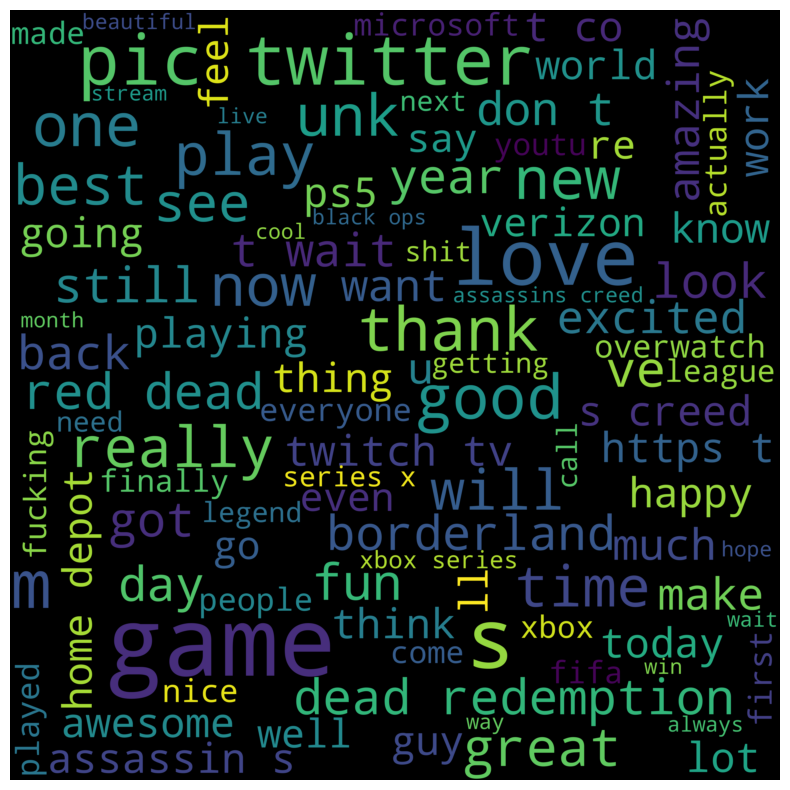

In [13]:
word_cloud_text = ''.join(df[df["label"]=="Positive"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

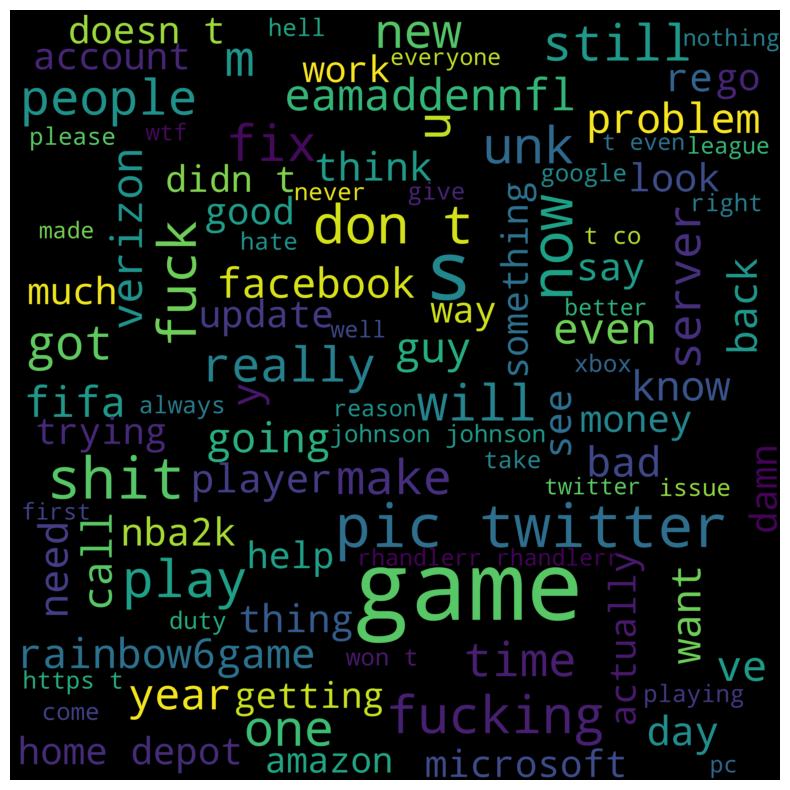

In [14]:
word_cloud_text = ''.join(df[df["label"]=="Negative"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

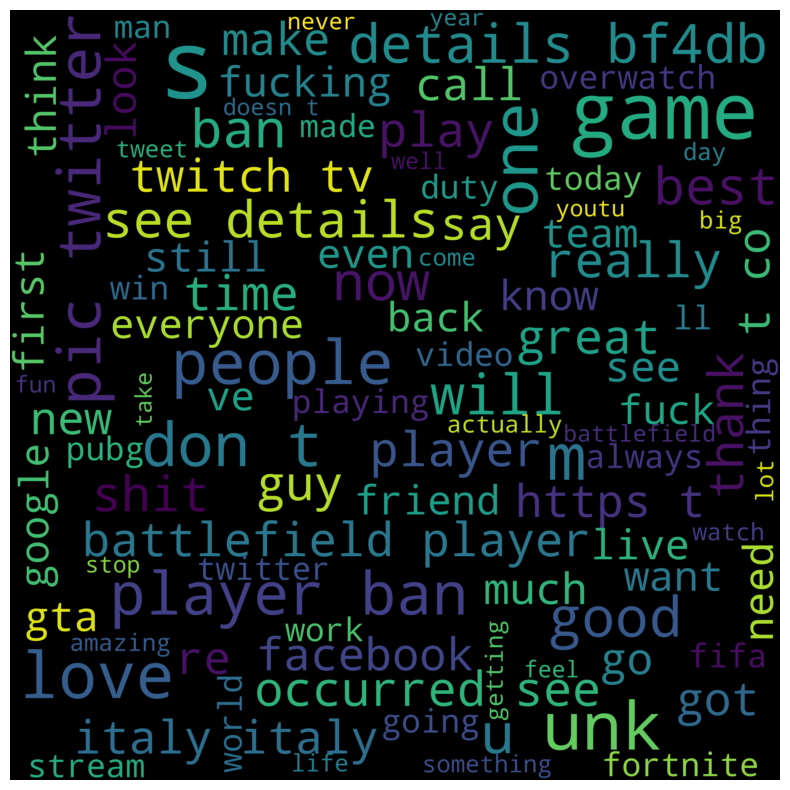

In [16]:
word_cloud_text = ''.join(df[df["label"]=="Irrelevant"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

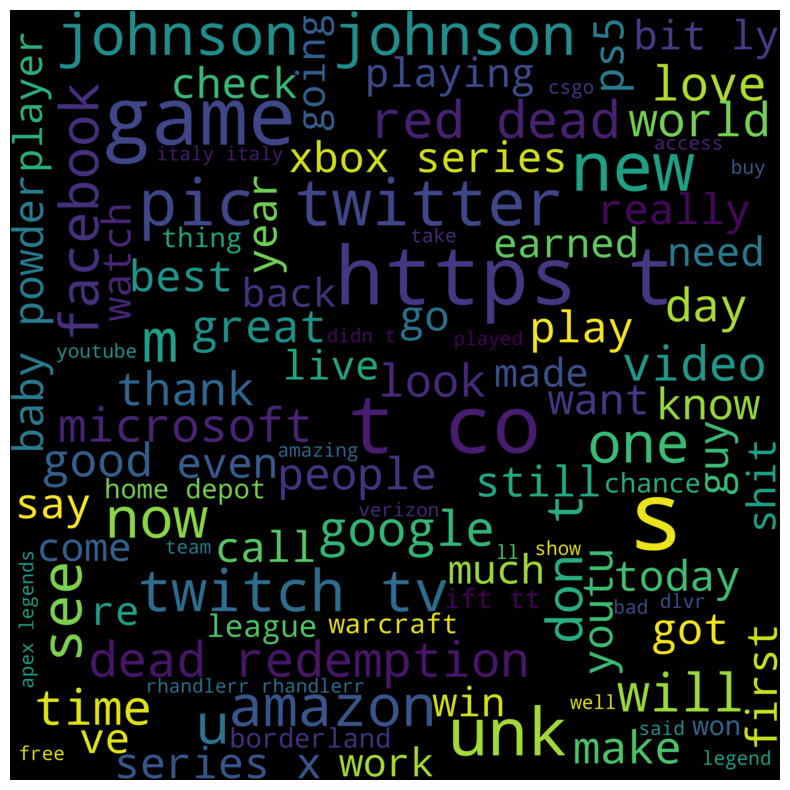

In [17]:
word_cloud_text = ''.join(df[df["label"]=="Neutral"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

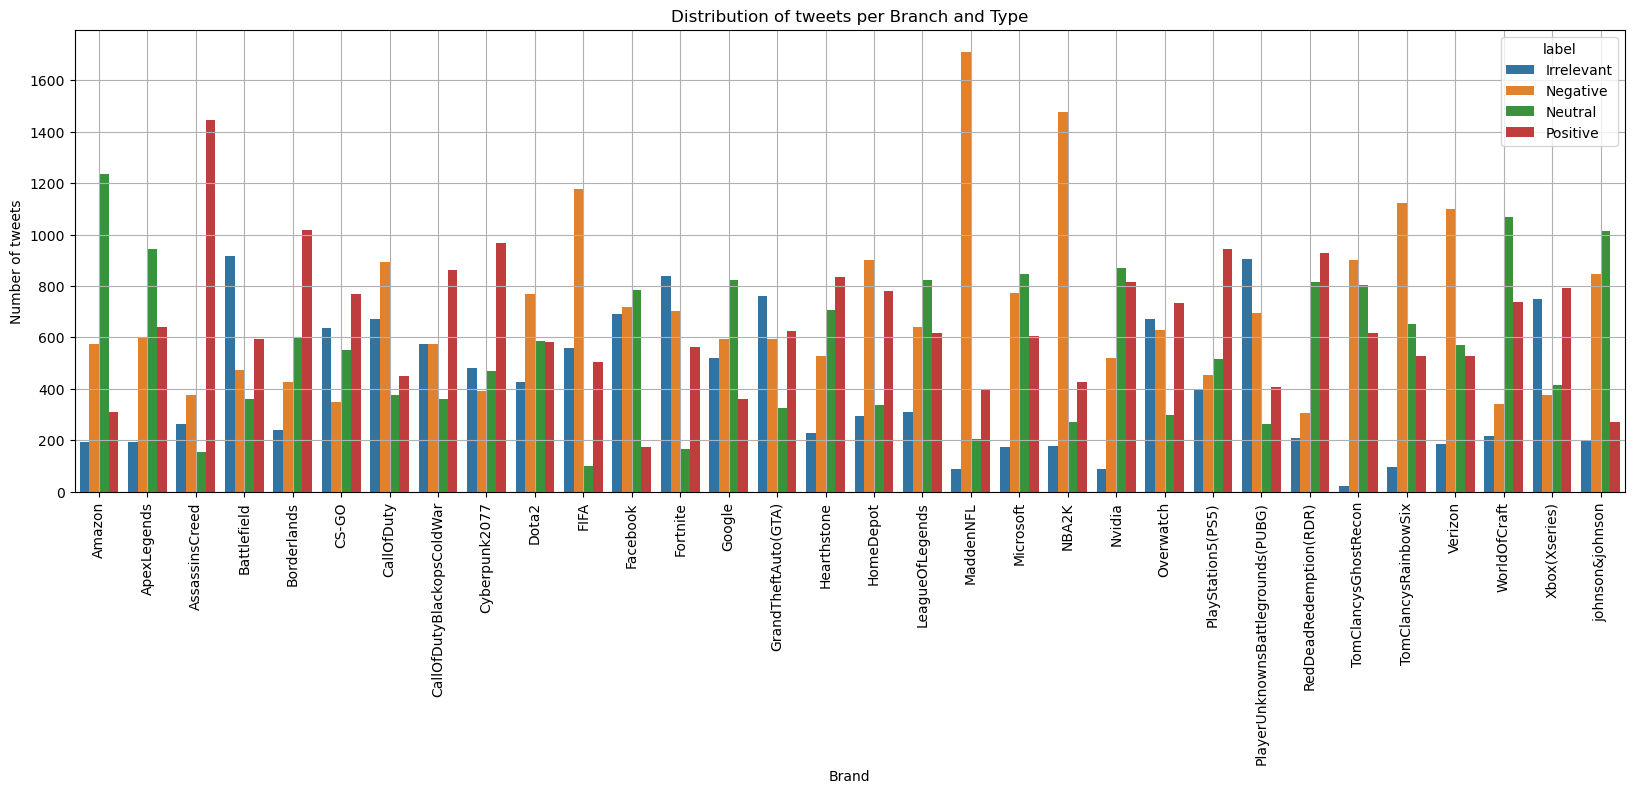

In [24]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="info",y="id",hue="label")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

# **Box Plot**

A box plot, also known as a box-and-whisker plot, is a statistical visualization that provides a summary of the distribution of a continuous variable. It displays the five-number summary of the data, including the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

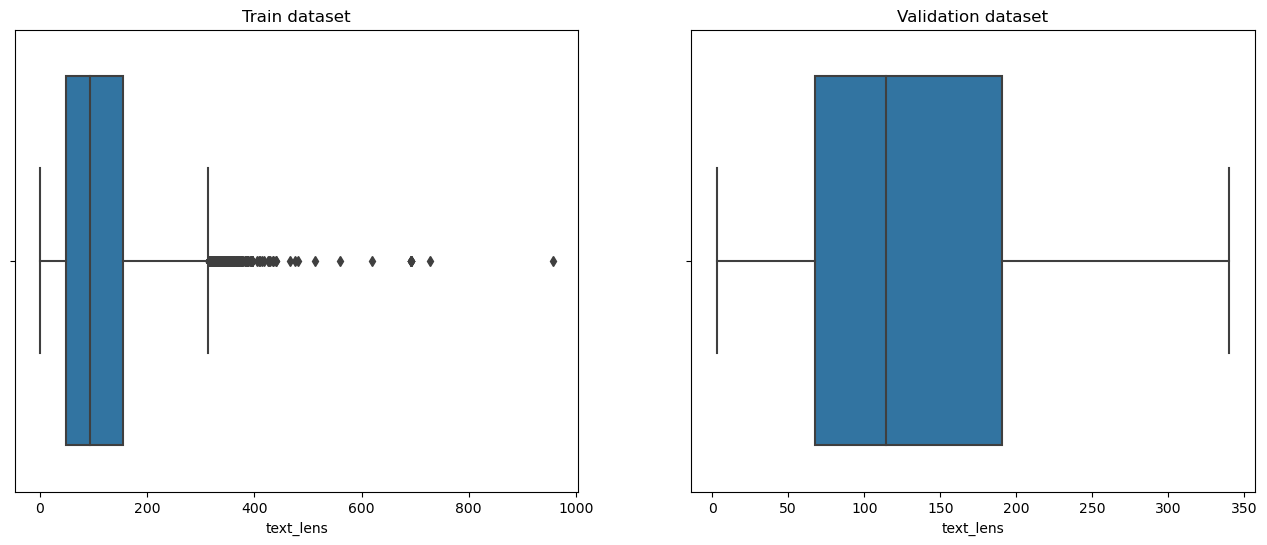

In [24]:
fig , ax = plt.subplots(1,2,figsize=(16,6))

sns.boxplot(data=train,x='text_lens',ax=ax[0])
sns.boxplot(data=validation,x='text_lens',ax=ax[1])

ax[0].set_title("Train dataset")
ax[1].set_title("Validation dataset")

plt.show()

# **Data Preprocessing**

In [25]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#remove outliers
train = remove_outlier(train,'text_lens')

# **Tokenazation and Lemmatization**

Tokenization is the process of breaking down a text into individual units, called tokens. Tokens can be words, sentences, or subwords, depending on the specific task and level of granularity required.

Lemmatization is the process of reducing words to their base or root form, known as the lemma, in order to normalize variations of the same word. It is a common technique used in natural language processing (NLP) to enhance text analysis and improve the accuracy of linguistic operations.

Stop words are commonly used words in natural language that are typically removed during text processing and analysis due to their high frequency and lack of significant semantic meaning. These words are considered to be noise and do not contribute much to the overall understanding of the text.

In [26]:
nlp=spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_tokens=[]
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
    

train['preprocessed_text']=train['Tweet_content'].apply(lambda x: preprocess(x))
validation['preprocessed_text']=validation['Tweet_content'].apply(lambda x: preprocess(x))

/tmp/ipykernel_28/2587293682.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['preprocessed_text']=train['Tweet_content'].apply(lambda x: preprocess(x))


In [27]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train, y_test = train_test_split(
    train[['preprocessed_text']],
    train[['Sentiment']],
    test_size=0.2,
    random_state=42
)

# **Text to Vectors**

TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a commonly used technique in natural language processing (NLP) to convert textual data into numerical feature vectors. It aims to capture the importance of words in a document collection by assigning higher weights to terms that are more relevant to a specific document and less frequent in the entire corpus.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()

X_train_vect= vectorizer.fit_transform(X_train['preprocessed_text'])
X_test_vect= vectorizer.transform(X_test['preprocessed_text'])

y_train=y_train['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2,"Irrelevant":3})
y_test=y_test['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2,"Irrelevant":3})

In [29]:
validation_X = vectorizer.transform(validation['preprocessed_text'])
validation_y = validation['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2,"Irrelevant":3})

# **State of Art approach**

BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based language model that was introduced by Google in 2018. It is one of the most influential and widely used models in natural language processing (NLP). BERT revolutionized the field by demonstrating state-of-the-art performance on various NLP tasks.

The key innovation of BERT lies in its ability to learn contextualized word representations by training on a large corpus of unlabeled text. Unlike previous models that considered words in isolation, BERT takes into account the surrounding context of a word to capture its meaning more accurately.

BERT is built upon the transformer architecture, which is a type of neural network model designed to handle sequential data efficiently. Transformers rely on a mechanism called self-attention to capture dependencies between words in a sentence. This attention mechanism allows BERT to assign different weights to different words based on their relevance to each other.

Machine Learning Approach for Sentiment Analysis:

Machine learning approaches for sentiment analysis typically involve training a model on labeled data, where each data point is associated with a sentiment label (e.g., positive, negative, neutral). Here are some key characteristics of machine learning approaches:

1. Feature Engineering: In machine learning, feature engineering plays a crucial role. It involves manually selecting and extracting relevant features from the text data that can be used as inputs to the model. These features may include word frequencies, n-grams, lexical properties, syntactic patterns, etc. The quality and relevance of the engineered features can significantly impact the performance of the model.

2. Model Selection: Machine learning approaches offer a range of models that can be used for sentiment analysis, such as Naive Bayes, Support Vector Machines (SVM), Random Forest, etc. The choice of the model depends on the specific requirements of the task, the available labeled data, and the characteristics of the dataset.

3. Training and Inference: Once the features and the model are selected, the model is trained on the labeled data using a learning algorithm. During training, the model learns the underlying patterns and associations between the input features and the sentiment labels. After training, the model can be used to predict the sentiment of unseen text data.

4. Interpretability: Machine learning models often offer interpretability, as the features used in the model are explicitly engineered and can be examined to gain insights into the decision-making process. This interpretability can be valuable for understanding the factors that contribute to sentiment predictions.

State-of-the-Art Neural Network Approach for Sentiment Analysis:

State-of-the-art neural network approaches, particularly deep learning models, have achieved significant advancements in sentiment analysis. Here are some key characteristics of neural network approaches:

1. End-to-End Learning: Neural network models learn to extract relevant features automatically from raw text data, eliminating the need for manual feature engineering. These models can process sequences of words or characters directly, allowing them to capture complex patterns and dependencies in the text.

2. Representation Learning: Neural network models, such as recurrent neural networks (RNNs) or transformers, learn distributed representations of words or subword units during training. These representations, often referred to as word embeddings or contextualized embeddings, capture semantic and syntactic information and enhance the model's understanding of the text.

3. Model Architecture: Neural network models for sentiment analysis can have various architectures. Recurrent neural networks (RNNs) process sequences by maintaining internal states that capture contextual information. Convolutional Neural Networks (CNNs) can extract local patterns and features from text data. Transformers, such as BERT, use self-attention mechanisms to capture long-range dependencies efficiently.

4. Large-Scale Pretraining: Many state-of-the-art models, like BERT and its variants, are pretrained on massive amounts of unlabeled text data. This pretraining allows the models to learn rich contextual representations of words and sentences, which can then be fine-tuned on labeled sentiment analysis data.

5. Transfer Learning: Neural network models facilitate transfer learning, where models pretrained on large-scale tasks (e.g., language modeling) can be fine-tuned on specific sentiment analysis datasets with limited labeled data. This transfer learning enables better generalization and improved performance, especially when labeled data is scarce.

6. Performance: Neural network models have demonstrated superior performance on sentiment analysis tasks, often outperforming traditional machine learning approaches. They can capture subtle nuances and contextual information in the text, leading to more accurate sentiment predictions.

It's important to note that while neural network models offer state-of-the-art performance, they may require more computational resources and labeled data for training compared to traditional machine learning approaches. The choice between the two approaches depends on the specific requirements, available resources, and the trade-off between

# **Model Building**

In [30]:
model = MultinomialNB()
model.fit(X_train_vect,y_train)
y_predict= model.predict(X_test_vect)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      3969
           1       0.65      0.90      0.75      4210
           2       0.83      0.64      0.72      3494
           3       0.94      0.45      0.61      2495

    accuracy                           0.73     14168
   macro avg       0.78      0.70      0.71     14168
weighted avg       0.76      0.73      0.72     14168



In [31]:
model = RandomForestClassifier()
model.fit(X_train_vect,y_train)
y_predict= model.predict(X_test_vect)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3969
           1       0.92      0.93      0.93      4210
           2       0.93      0.89      0.91      3494
           3       0.96      0.85      0.90      2495

    accuracy                           0.91     14168
   macro avg       0.92      0.90      0.91     14168
weighted avg       0.91      0.91      0.91     14168



In [32]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X_train_vect,y_train)
y_predict= model_extra.predict(X_test_vect)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3969
           1       0.94      0.94      0.94      4210
           2       0.95      0.92      0.93      3494
           3       0.98      0.87      0.93      2495

    accuracy                           0.93     14168
   macro avg       0.93      0.92      0.93     14168
weighted avg       0.93      0.93      0.93     14168



# **Conclusion**

![](http:////miro.medium.com/v2/resize:fit:1400/1*CbzCcP3XFtYVJmWowZLugQ.png)

The above image shows the basic pipeline that is being followed in this project. It includes first text cleaning, tokenization, removing stop words , lemmatization and after all these preprocessing we are applying Machine Learning model on the dataset.

The overall strength of the pipeline is that is works really well on the following data it can handle some complex sentences also and provide the result of their sentiment and the limitation this pipeline may involve is that it may not be able to handle very complex sentences.

# **Implications**

The above NLP pipeline will help a business to like Twitter, instagram to detect any negative , positive or hate speech and will help to take possible actions against that account to maintain the integrity of the platform so that more and more engagement can be seen on the platform.